In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = np.load('blended_props.npy')
y = np.load('blended_bool.npy')

In [4]:
params = ['u','g','r','i','z','redshift', 'u2','g2','r2','i2','z2','redshift2', 'dist']
params2 = ['du','dg','dr','di','dz','dredshift', 'dist']

In [5]:
X2 = np.zeros((y.shape[0], len(params2)) )
X2[:, :-1] = np.abs(X[:, :len(params2)-1] - X[:, len(params2)-1:-1] )
X2[:, -1] = X[:, -1]

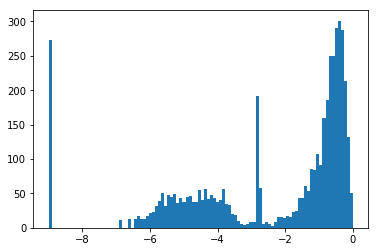

In [6]:
plt.hist(np.log10(X2[:,-2] + 1e-9), bins = 100);

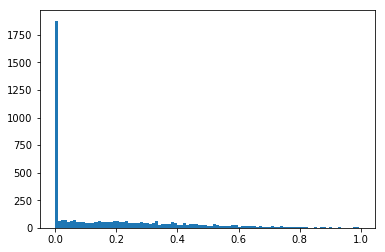

In [7]:
plt.hist(X2[:,-2], bins = 100);

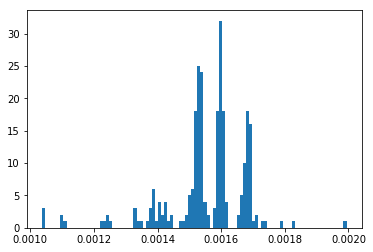

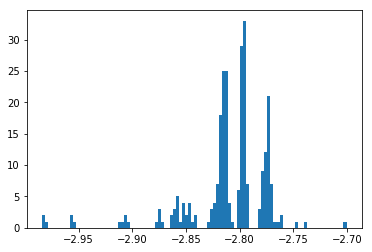

In [8]:
idxs = np.logical_and( 1e-3 < X2[:, -2], X2[:, -2] < 2e-3)
plt.hist(X2[idxs,-2], bins = 100);
plt.show();
plt.hist(np.log10(X2[idxs, -2]), bins = 100);
plt.show()

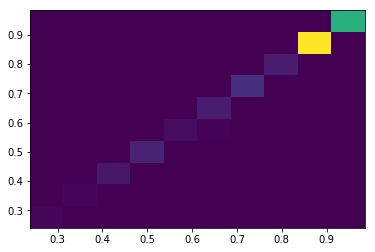

In [9]:
plt.hist2d(X[idxs, 5], X[idxs,11], bins = 10);
plt.show()

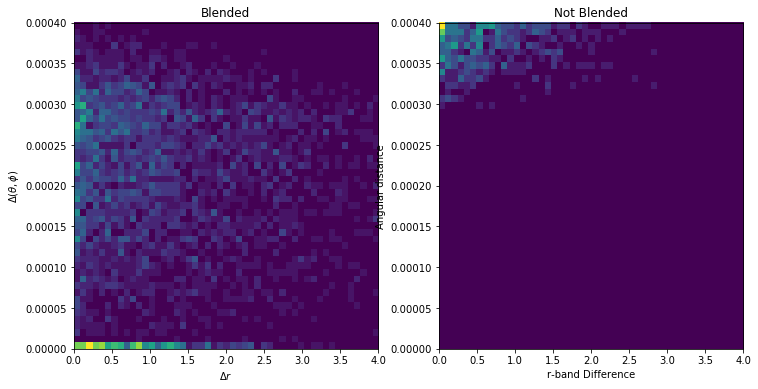

In [14]:
idx1, idx2 = 2, -1
bins = [np.linspace(0.0, 4.0, 50), np.linspace(0.0, 4e-4, 50)]
#bins = 20

fig = plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Blended')
plt.hist2d(X2[y,idx1],X2[y,idx2], bins = bins, normed=True)
#plt.ylim([0.0001, 0.0005])
plt.xlabel(r'$\Delta r$')
plt.ylabel(r'$\Delta (\theta, \phi)$')

plt.subplot(122)
plt.title('Not Blended')
plt.hist2d(X2[~y,idx1], X2[~y,idx2], bins = bins, normed = True)

#plt.ylim([0.0001, 0.0005])
plt.xlabel('r-band Difference')
plt.ylabel('Angular distance')

plt.show()

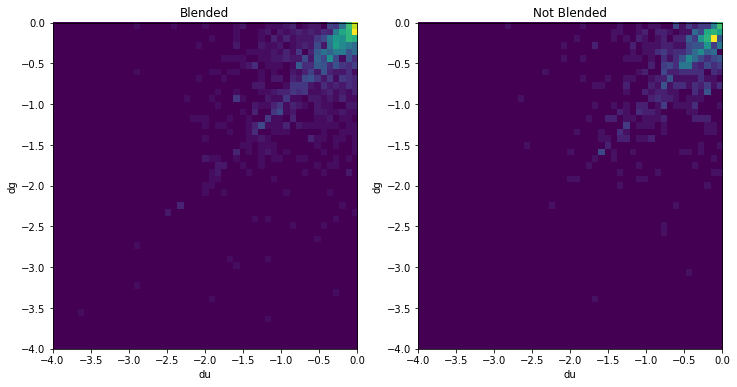

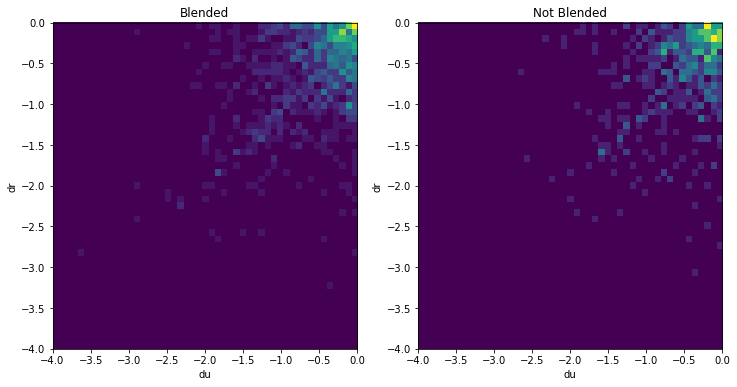

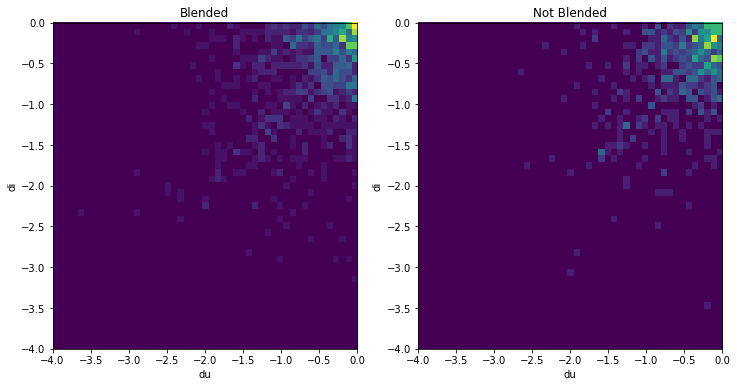

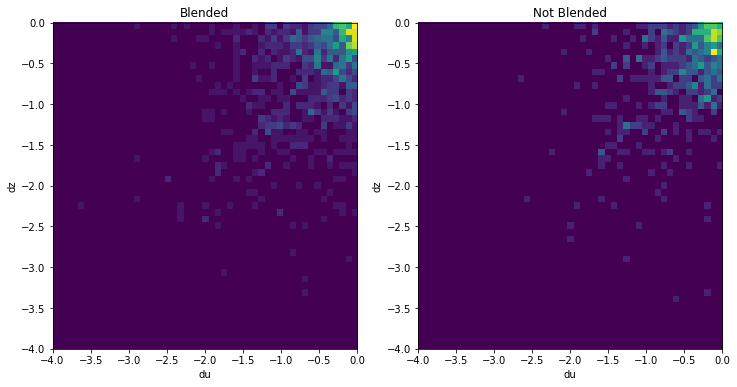

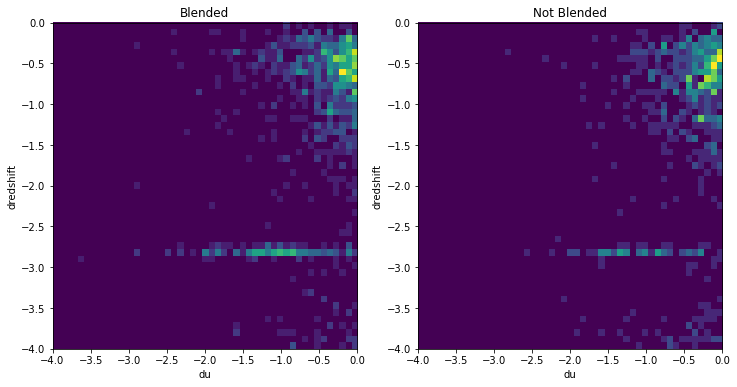

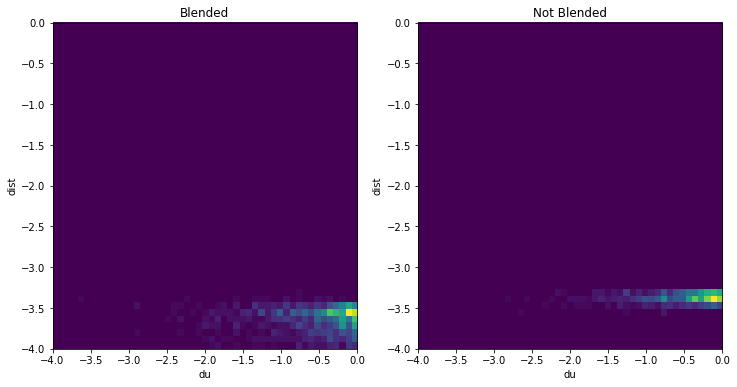

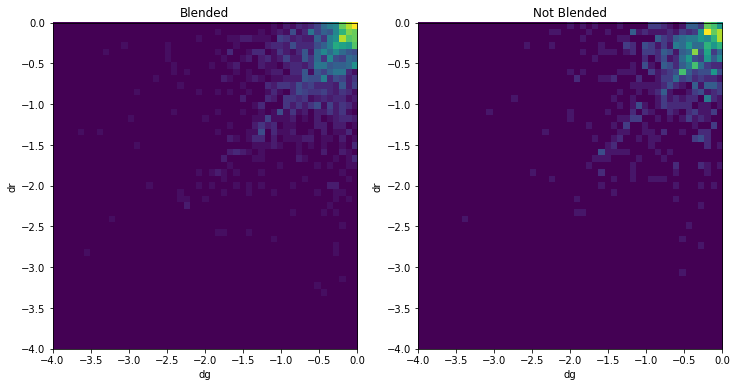

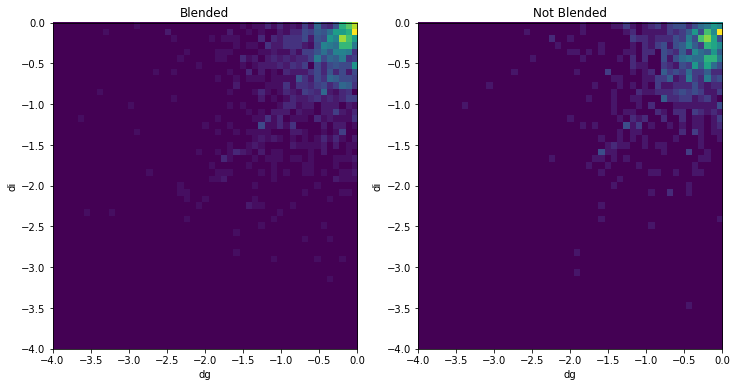

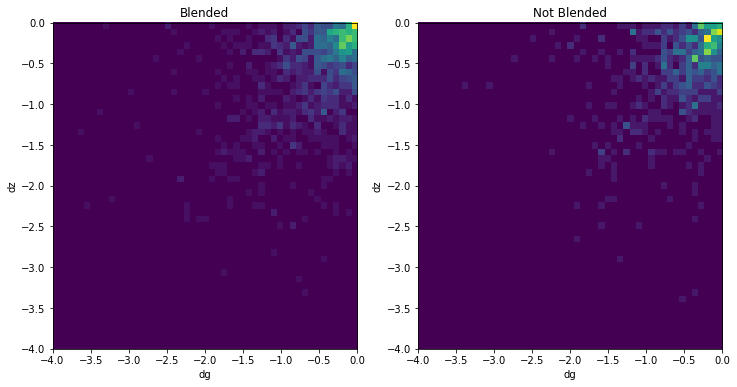

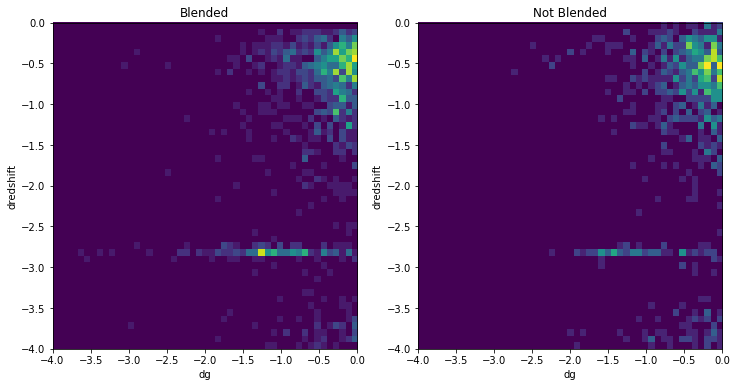

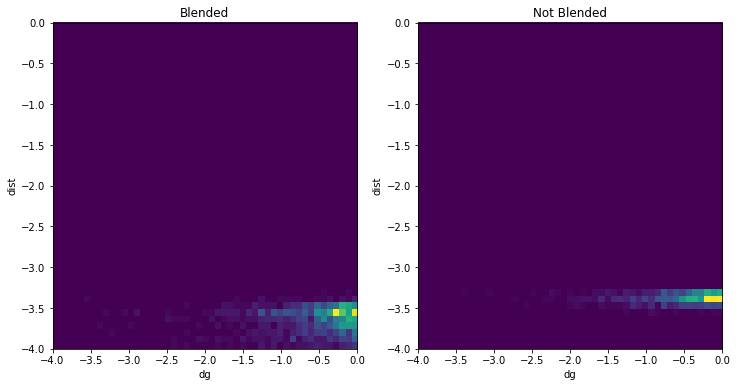

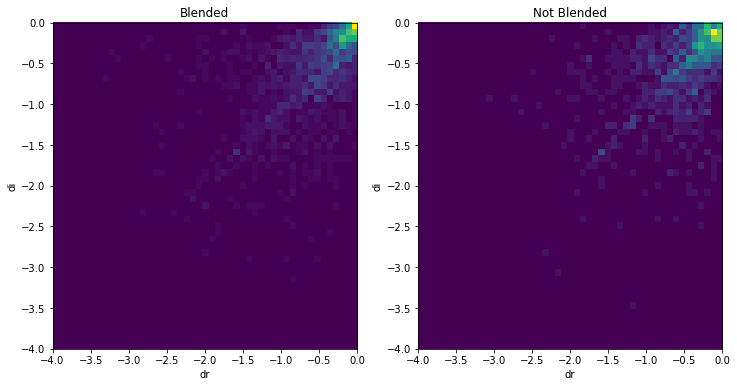

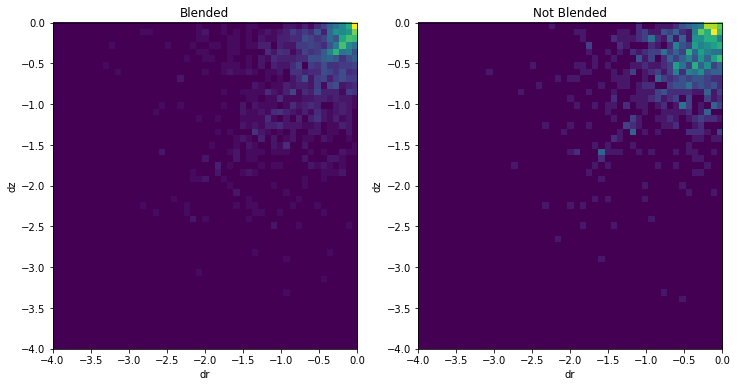

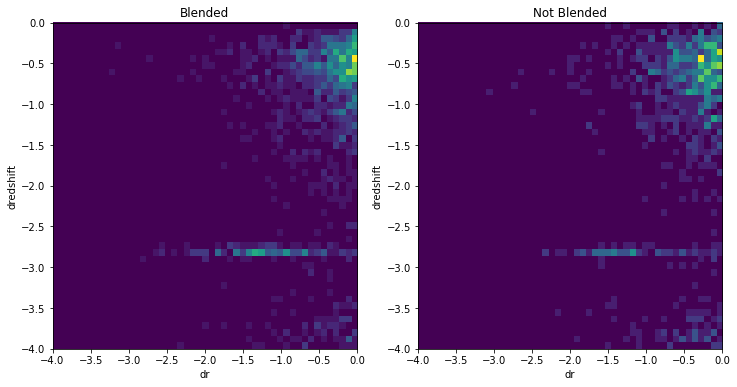

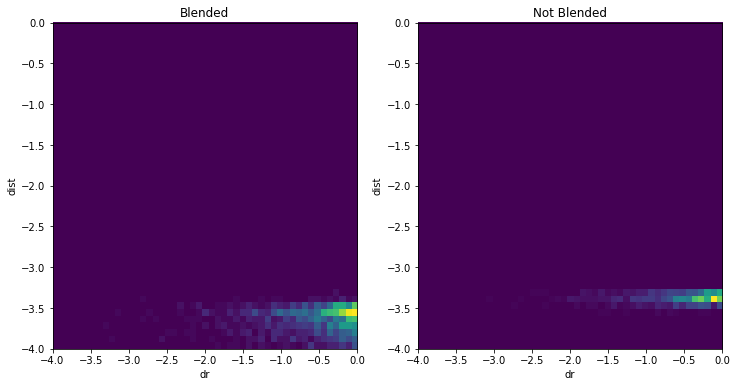

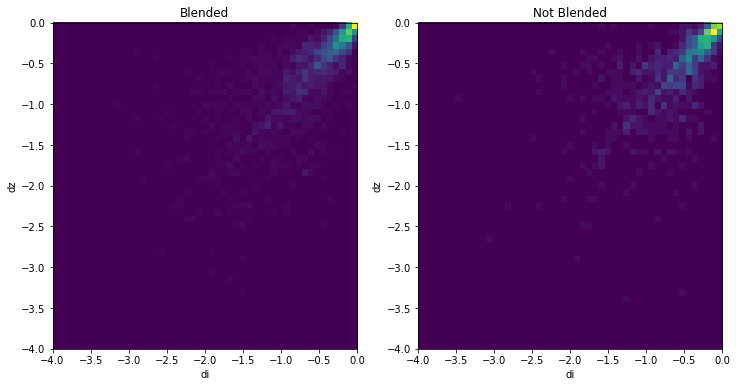

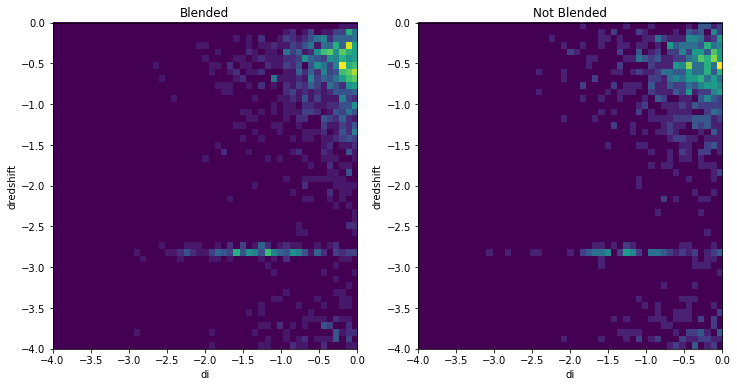

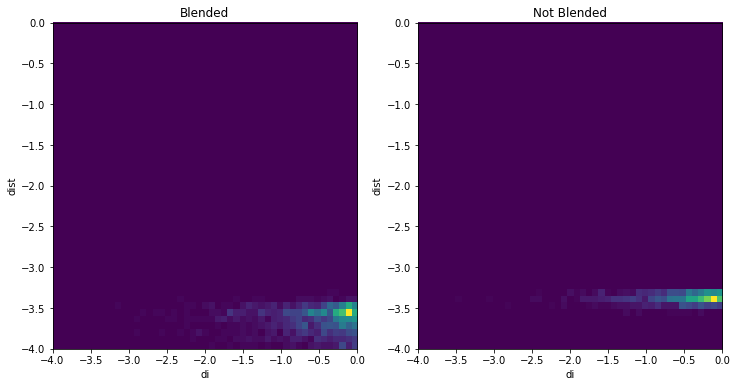

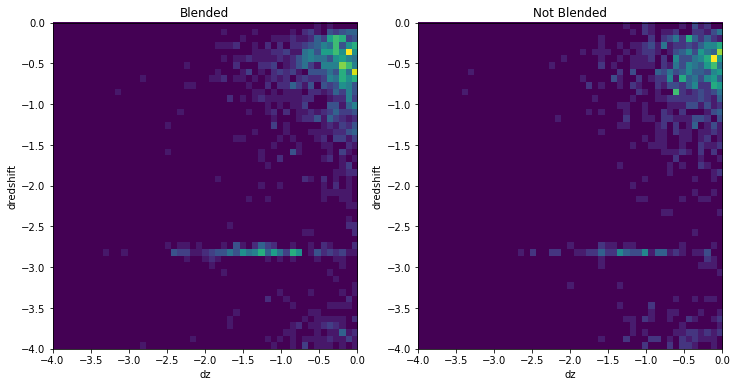

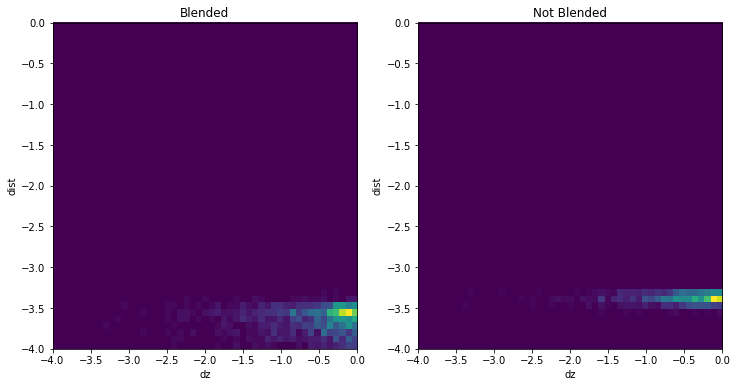

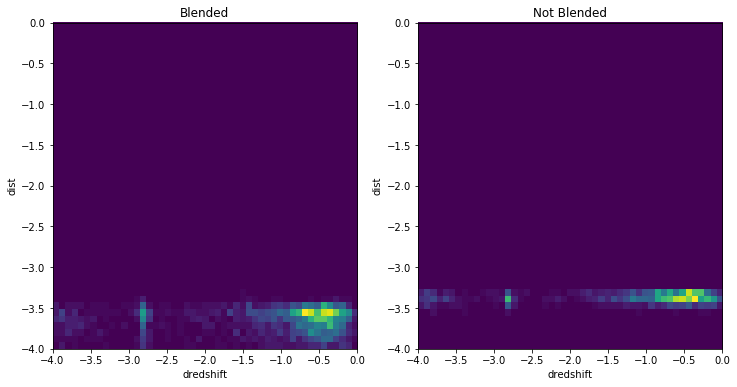

In [41]:
bins = np.linspace(-4, 0.0, 50)
for idx1 in range(X2.shape[1]-1):
    for idx2 in range(idx1+1, X2.shape[1]):
        fig = plt.figure(figsize=(12, 6))
        plt.subplot(121)
        plt.title('Blended')
        plt.hist2d(np.log10(X2[y,idx1]+1e-9), np.log10(X2[y,idx2]+1e-9), bins = bins, normed=True)
        #plt.ylim([0.0001, 0.0005])
        plt.xlabel(params2[idx1])
        plt.ylabel(params2[idx2])
        
        plt.subplot(122)
        plt.title('Not Blended')
        plt.hist2d(np.log10(X2[~y,idx1] + 1e-9), np.log10(X2[~y,idx2]+1e-9), bins = bins, normed = True)

        #plt.ylim([0.0001, 0.0005])
        plt.xlabel(params2[idx1])
        plt.ylabel(params2[idx2])

        #plt.title('%s vs %s'%(params2[idx1], params2[idx2]))
        plt.show();

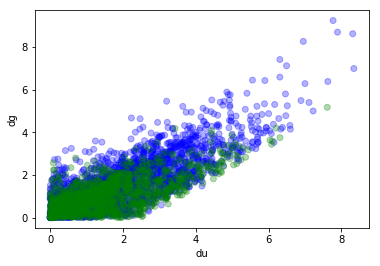

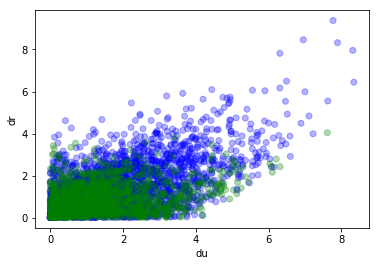

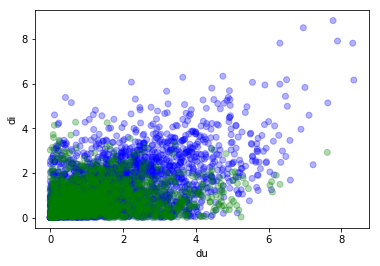

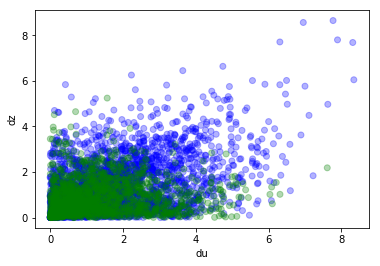

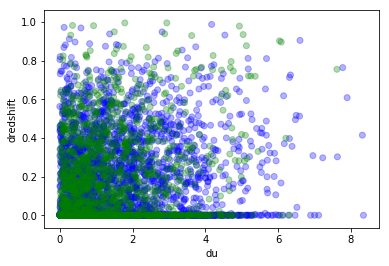

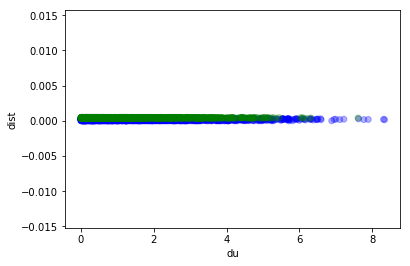

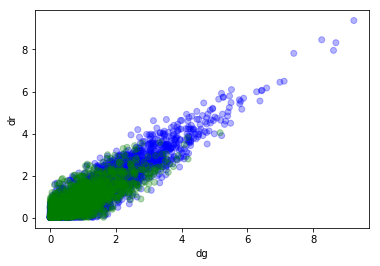

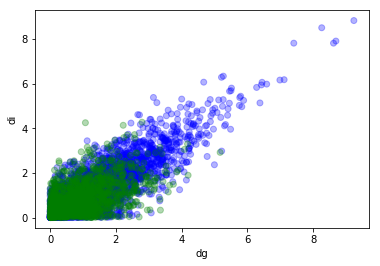

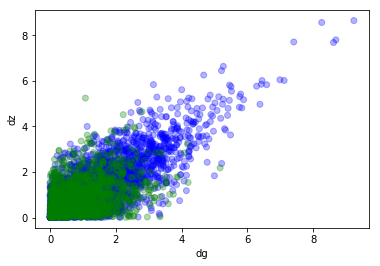

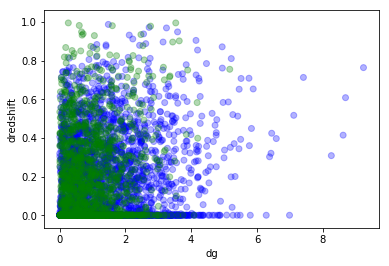

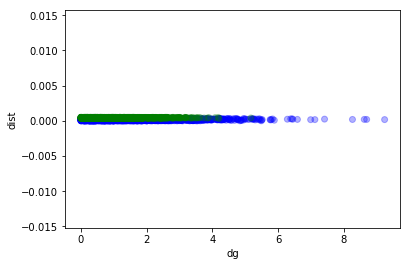

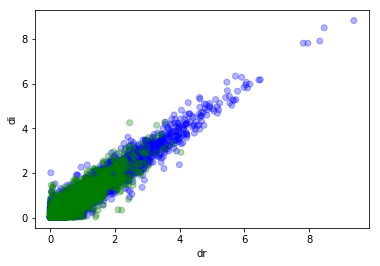

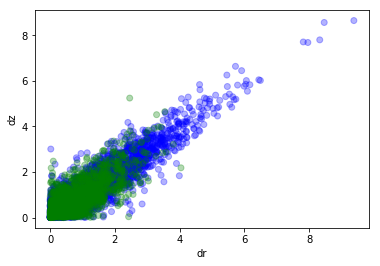

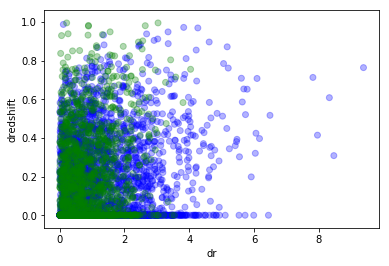

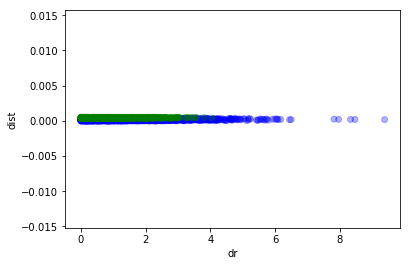

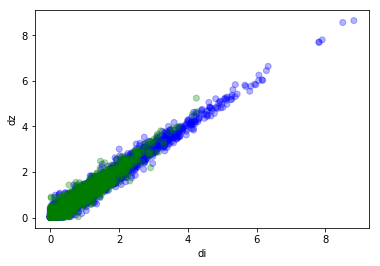

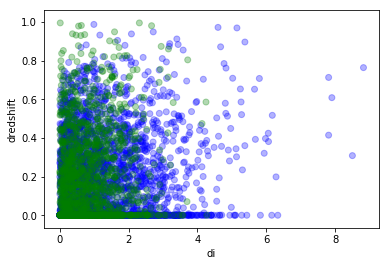

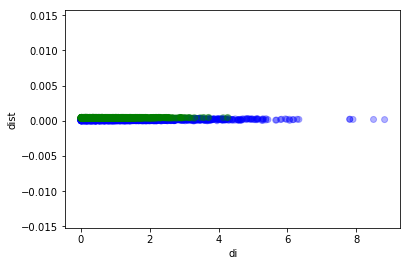

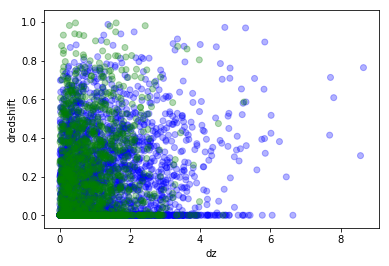

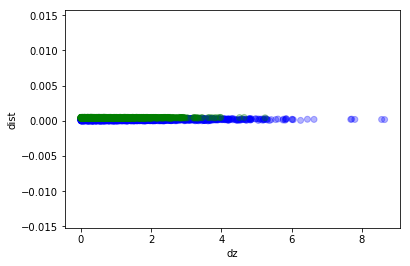

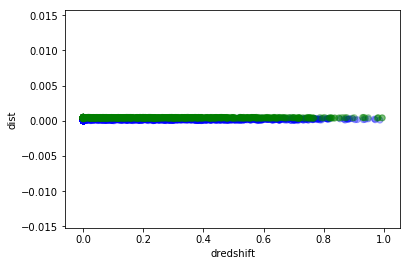

In [16]:
for idx1 in range(X2.shape[1]-1):
    for idx2 in range(idx1+1, X2.shape[1]):
        colors = ['b' if blend else 'g' for blend in y]

        plt.scatter(X2[:,idx1], X2[:,idx2], color = colors, alpha = 0.3)
        #plt.ylim([0.0001, 0.0005])
        plt.xlabel(params2[idx1])
        plt.ylabel(params2[idx2])

        #plt.title('%s vs %s'%(params2[idx1], params2[idx2]))
        plt.show();